In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
class_names = ['Bean', 'Broccoli', 'Carrot', 'Cauliflower', 'Tomato']

In [3]:
def load_model(path):
    print("Loading the model..")
    model = tf.keras.models.load_model(path)
    print("Done!")
    return model

In [11]:
def predict_image(path):
    img = tf.keras.utils.load_img(path, target_size=(128, 128))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    prediction = class_names[np.argmax(score)]

    return prediction

In [5]:
def labels_confusion_matrix(folder_path):
    real=[]
    predicted=[]


    for i in os.listdir(folder_path):
        
        true = i
        
        for j in os.listdir(os.path.join(folder_path,i)):

            prediction = predict_image(os.path.join(folder_path,i,j))

            predicted.append(prediction)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    cm_plot_labels = [i for i in range(5)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2)
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap="turbo")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

Loading the model..
Done!
1/1 [==============================] - 0s 24ms/step


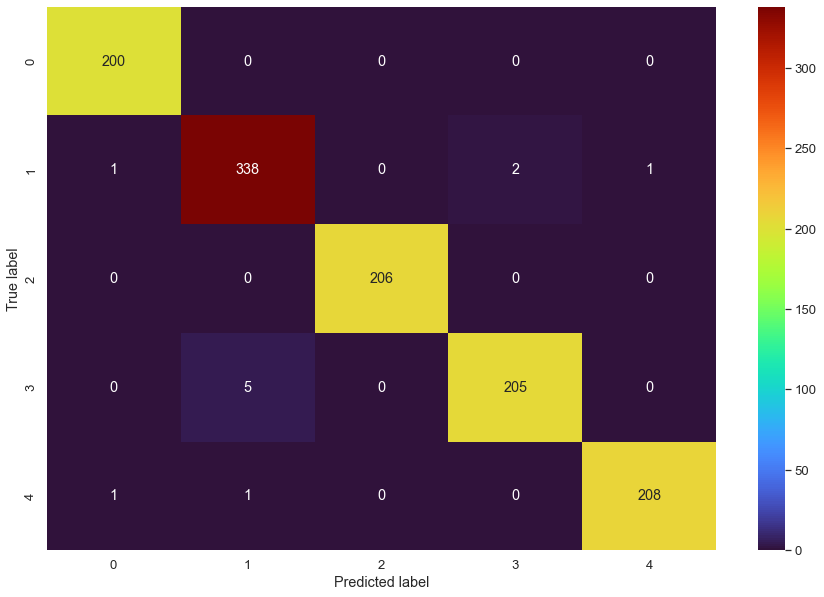

In [12]:
test_path = os.path.join('..', 'dataset_extra_data', 'test')

model = load_model('./model/resnet_model')

y_true,y_pred=labels_confusion_matrix(test_path)
print_confusion_matrix(y_true,y_pred)